In [18]:
import pandas as pd

# get the number of extracted genes and publications in odb
known_odb_original = pd.read_csv(r'C:\Users\BiSBII\Desktop\protrend\data_lake\operondb\0.0.0\known_operon.txt',
                        sep='\t')
conserved_odb_original = pd.read_csv(r'C:\Users\BiSBII\Desktop\protrend\data_lake\operondb\0.0.0\conserved_operon.txt',
                        sep='\t')

known_odb = known_odb_original.copy()
known_odb.op = known_odb.op.str.split(',')
known_odb = known_odb.explode('op')
n_known_odb = len(known_odb.op.unique())

conserved_odb = conserved_odb_original.copy()
conserved_odb.op = conserved_odb.op.str.split(',')
conserved_odb = conserved_odb.explode('op')
n_conserved_odb = len(conserved_odb.op.unique())

print('genes', n_known_odb + n_conserved_odb)

known_odb = known_odb_original.copy()
known_odb.source = known_odb.source.str.split(' ')
known_odb = known_odb.explode('source')
n_pub_known_odb = len(known_odb.source.unique())
n_pub_known_odb

genes 3232959


485

In [19]:
from protrend.io import read_json_lines
genes_regprecise = read_json_lines(r'C:\Users\BiSBII\Desktop\protrend\data_lake\regprecise\0.0.0\Gene.json')
genes_regprecise.shape[0]

116716

In [4]:
import json
from pathlib import Path

import pandas as pd

from protrend.utils import Settings

# the remaining report is mostly correct
report_file_path = Path(Settings.report_working_directory).joinpath('protrend_report_2022_09_01_10_22_14.json')
with open(report_file_path, 'r') as f:
    report = json.load(f)

df = pd.DataFrame(list(report.values()))
df

,source,version,system,label,objects,properties,source_label,target_label,relationships
0,collectf,0.0.1,transform,evidence,56.0,5.0,NaN,NaN,NaN
1,collectf,0.0.1,integrate,evidence,56.0,9.0,NaN,NaN,NaN
2,collectf,0.0.1,extract,organism,153.0,7.0,NaN,NaN,NaN
3,collectf,0.0.1,transform,organism,155.0,14.0,NaN,NaN,NaN
4,collectf,0.0.1,integrate,organism,153.0,19.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
373,standardizer,0.0.0,integrate,regulatoryinteraction,111.0,1.0,NaN,NaN,NaN
374,standardizer,0.0.0,transform,evidence,104.0,1.0,NaN,NaN,NaN
375,standardizer,0.0.0,integrate,evidence,104.0,1.0,NaN,NaN,NaN
376,standardizer,0.0.0,transform,publication,16230.0,1.0,NaN,NaN,NaN


In [5]:
df = pd.pivot_table(df, values='objects', index=['source', 'system'], columns=['label'], aggfunc=sum)
df = df.reindex(['extract', 'transform', 'integrate', 'load'], level='system')
df = df.fillna('-')

# set integrate numbers to load numbers
df_integrate = df.loc[:, ['load'], :].reindex(['load'], level='system')
df_integrate.index = df_integrate.index.set_levels(['integrate'], level='system')
df.loc[:, ['integrate'], :] = df_integrate
df = df.drop(columns=['integrate'])
df

label                  effector evidence     gene    motif     operon  \
source       system                                                     
abasy        extract          -        -  11662.0        -          -   
             transform        -        -  11543.0        -          -   
             integrate        -        -   9423.0        -          -   
             load             -        -   9423.0        -          -   
collectf     extract          -        -   1980.0        -          -   
             transform        -     56.0   1976.0        -          -   
             integrate        -     56.0   1976.0        -          -   
             load             -     56.0   1976.0        -          -   
coryneregnet extract          -        -   3921.0        -          -   
             transform        -      3.0   3881.0        -          -   
             integrate        -      3.0    419.0        -          -   
             load             -      3.0    419.0        -          -   
dbtbs        extract          -        -    682.0        -          -   
             transform        -        -    682.0        -          -   
             integrate        -        -     20.0        -          -   
             load             -        -     20.0        -          -   
literature   extract      140.0        -   4859.0        -          -   
             transform    140.0        -   4859.0        -          -   
             integrate     90.0        -    649.0        -          -   
             load          90.0        -    649.0        -          -   
motif        transform        -        -        -  74118.0          -   
             integrate        -        -        -  11966.0          -   
             load             -        -        -  11966.0          -   
operondb     extract          -        -        -        -  6135320.0   
             transform        -        -  12156.0        -    22905.0   
             integrate        -        -    492.0        -    22905.0   
             load             -        -    492.0        -    22905.0   
regprecise   extract      308.0        -  11575.0        -          -   
             transform    308.0        -  89245.0        -          -   
             integrate    308.0        -  88477.0        -          -   
             load         308.0        -  88477.0        -          -   
regulondb    extract      137.0        -   4168.0        -          -   
             transform    137.0    127.0   4085.0        -          -   
             integrate    103.0    123.0   1565.0        -          -   
             load         103.0    123.0   1565.0        -          -   
standardizer transform     95.0    104.0   3483.0        -        0.0   
             integrate      NaN      NaN      NaN      NaN        NaN   

label                  organism pathway publication regulator  \
source       system                                             
abasy        extract        9.0       -           -     707.0   
             transform      9.0       -           -     707.0   
             integrate      3.0       -           -     526.0   
             load           3.0       -           -     526.0   
collectf     extract      153.0       -           -     342.0   
             transform    155.0       -       526.0     236.0   
             integrate    153.0       -       526.0     230.0   
             load         153.0       -       526.0     230.0   
coryneregnet extract          -       -           -     539.0   
             transform      4.0       -       465.0     538.0   
             integrate        -       -       441.0     168.0   
             load             -       -       441.0     168.0   
dbtbs        extract          -       -           -     109.0   
             transform      1.0       -       819.0     109.0   
             integrate        -       -       462.0         -   
             load             -       -       4

In [6]:
# this excel should be manually corrected, as some rows are missing in the report
df = df.rename(columns={'effector': 'Effector',
                        'evidence': 'Evidence',
                        'gene': 'Gene',
                        'motif': 'Motif',
                        'operon': 'Operon',
                        'organism': 'Organism',
                        'pathway': 'Pathway',
                        'publication': 'Publication',
                        'regulator': 'Regulator',
                        'regulatoryfamily': 'Regulatory Family',
                        'regulatoryinteraction': 'Regulatory Interaction',
                        'source': 'Source',
                        'tfbs': 'TFBS'})
df = df.rename(index={'abasy': 'Abasy',
                      'collectf': 'CollecTF',
                      'coryneregnet': 'CoryneRegNet',
                      'dbtbs': 'DBTBS',
                      'literature': 'Literature',
                      'motif': 'Motif',
                      'operondb': 'ODB',
                      'regprecise': 'RegPrecise',
                      'regulondb': 'RegulonDB',
                      'standardizer': 'Standardizer'})
df.to_excel('./integration_report_to_curate.xlsx')

In [24]:
df_integration = pd.read_excel('./integration_report.xlsx', index_col=0)
df_integration.index = pd.Series(df_integration.index).fillna(method='ffill')
df_integration = df_integration.drop(index=['ODB', 'Motif', 'Standardizer'])
df_integration = df_integration.dropna(subset=['System'])
df_integration = df_integration.replace({'-': None, 'extract': 'E', 'transform': 'T', 'integrate': 'I', 'load': 'L'})
df_integration

,System,Effector,Evidence,Gene,Motif,Operon,Organism,Pathway,Publication,Regulator,Regulatory Family,Regulatory Interaction,Source.1,TFBS
Source,,,,,,,,,,,,,,
Abasy,E,NaN,NaN,11662,None,None,9,NaN,NaN,707,NaN,11332,1.0,NaN
Abasy,T,NaN,NaN,11543,None,None,9,NaN,NaN,707,NaN,11332,1.0,NaN
Abasy,I,NaN,NaN,9423,None,None,3,NaN,NaN,526,NaN,11329,1.0,NaN
Abasy,L,NaN,NaN,9423,None,None,3,NaN,NaN,526,NaN,11329,1.0,NaN
CollecTF,E,NaN,56.0,1980,None,None,153,NaN,526.0,342,NaN,2539,1.0,3649.0
CollecTF,T,NaN,56.0,1976,None,None,153,NaN,526.0,236,NaN,2539,1.0,3579.0
CollecTF,I,NaN,56.0,1976,None,None,153,NaN,526.0,230,NaN,2539,1.0,3579.0
CollecTF,L,NaN,56.0,1976,None,None,153,NaN,526.0,230,NaN,2539,1.0,3579.0
CoryneRegNet,E,NaN,3.0,3921,None,None,4,NaN,465.0,539,NaN,9051,1.0,4841.0


In [25]:
data = df_integration.reset_index(drop=False)
src_order = ['CollecTF', 'RegPrecise', 'Abasy', 'CoryneRegNet', 'Literature', 'DBTBS', 'RegulonDB']
system_order = ['E', 'T', 'I', 'L']

data['Source'] = pd.Categorical(data['Source'], src_order)
data['System'] = pd.Categorical(data['System'], system_order)
data = data.sort_values(['Source', 'System'])
data

,Source,System,Effector,Evidence,Gene,Motif,Operon,Organism,Pathway,Publication,Regulator,Regulatory Family,Regulatory Interaction,Source.1,TFBS
4,CollecTF,E,NaN,56.0,1980,None,None,153,NaN,526.0,342,NaN,2539,1.0,3649.0
5,CollecTF,T,NaN,56.0,1976,None,None,153,NaN,526.0,236,NaN,2539,1.0,3579.0
6,CollecTF,I,NaN,56.0,1976,None,None,153,NaN,526.0,230,NaN,2539,1.0,3579.0
7,CollecTF,L,NaN,56.0,1976,None,None,153,NaN,526.0,230,NaN,2539,1.0,3579.0
20,RegPrecise,E,308.0,NaN,116716,None,None,524,287.0,311.0,15432,171.0,155893,1.0,62483.0
21,RegPrecise,T,308.0,NaN,89245,None,None,524,287.0,311.0,11605,171.0,155893,1.0,61965.0
22,RegPrecise,I,308.0,NaN,88477,None,None,460,287.0,299.0,11518,171.0,155893,1.0,61965.0
23,RegPrecise,L,308.0,NaN,88477,None,None,460,287.0,299.0,11518,171.0,155893,1.0,61965.0
0,Abasy,E,NaN,NaN,11662,None,None,9,NaN,NaN,707,NaN,11332,1.0,NaN
1,Abasy,T,NaN,NaN,11543,None,None,9,NaN,NaN,707,NaN,11332,1.0,NaN


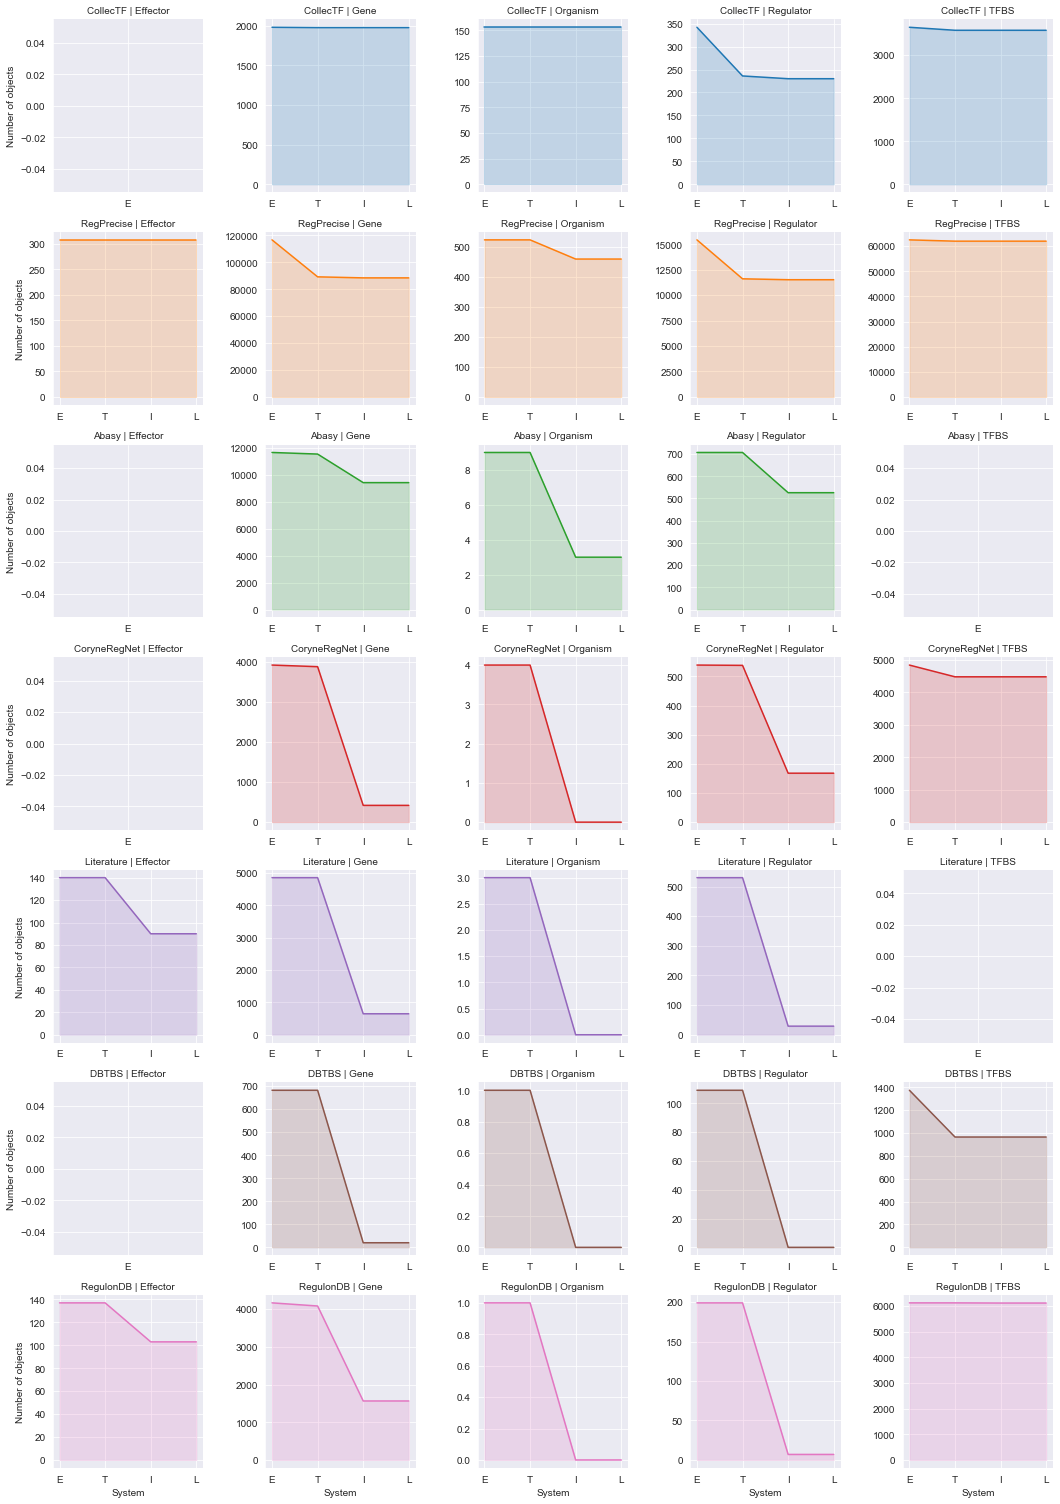

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns

sub_set = data[['Effector', 'Gene', 'Organism', 'Regulator', 'TFBS', 'Source', 'System']]
sub_set = pd.melt(sub_set,
                  id_vars=['Source', 'System'],
                  value_vars=['Effector', 'Gene', 'Organism', 'Regulator', 'TFBS'],
                  var_name='Object',
                  value_name='Value')

# Create a grid : initialize it
g = sns.FacetGrid(sub_set, col='Object', row='Source', hue='Source', sharex=False, sharey=False)

# Add the line over the area with the plot function
g = g.map(plt.plot, 'System', 'Value')

# Fill the area with fill_between
g = g.map(plt.fill_between, 'System', 'Value', alpha=0.2).set_titles("{col_name} source")

# Control the title of each facet
g = g.set_titles(col_template="{col_name}", row_template="{row_name}")
g = g.set_ylabels('Number of objects')

# Save & show the graph
plt.savefig("integration_report.png", bbox_inches="tight", dpi=150)
plt.show()